In [1]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import pickle

c:\Users\ADMIN\Downloads\MSc Business Data Science\bds_assignment\.env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Step 1: Prepare the data
dfw = pd.read_csv('../../features/weekly_feat.csv').drop(columns=['year', 'week'])
dfw = dfw[dfw['price_per_kg'] <= 5]
dfw['posting_date'] = pd.to_datetime(dfw['posting_date'])
dfw.set_index('posting_date', inplace=True)
dfw = dfw.sort_index()

# Calculate the split point for chronological train-test split
split_index = int(len(dfw) * (1 - 0.2))
# Get test set for explainer
X_test = dfw.iloc[split_index:].drop(columns=['price_per_kg'])
y_test = dfw.iloc[split_index:]['price_per_kg']

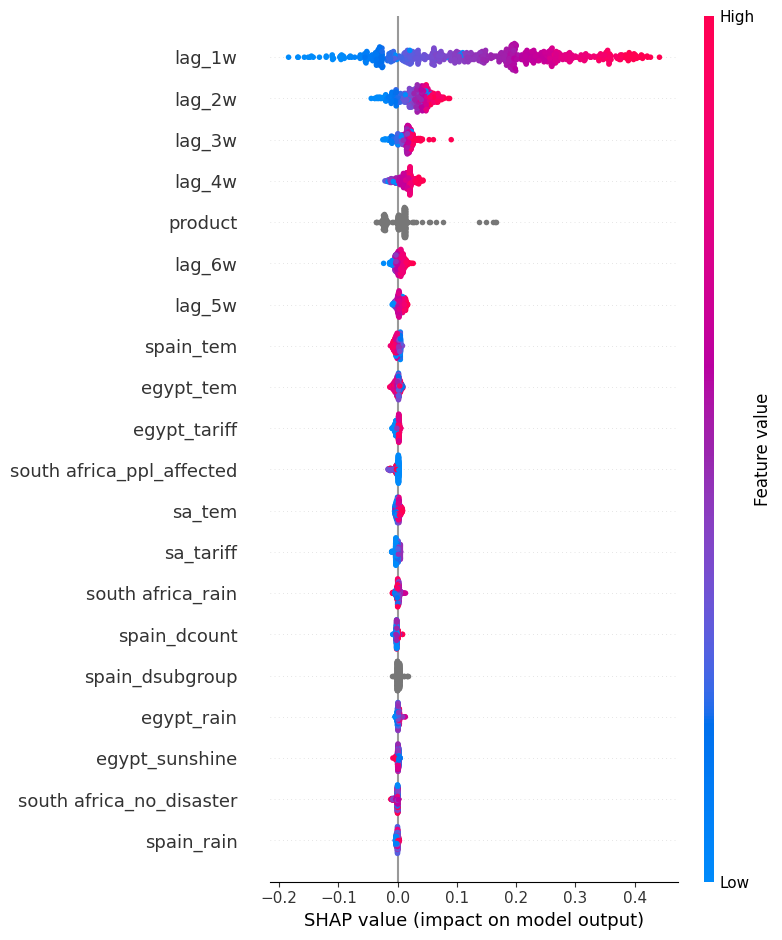

<Figure size 640x480 with 0 Axes>

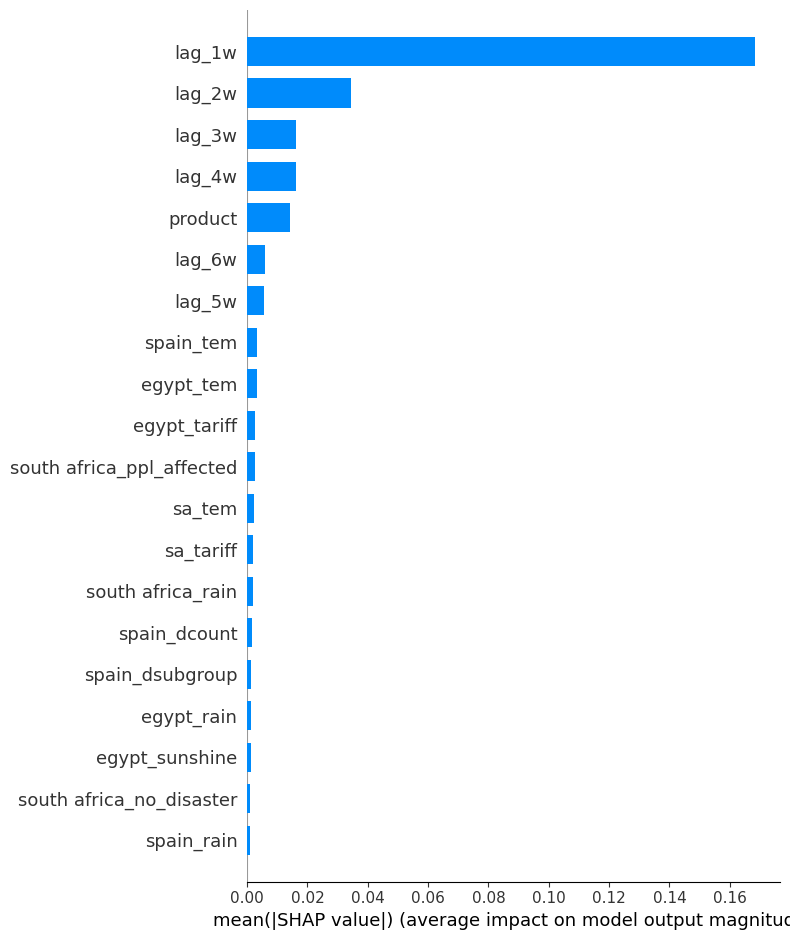

<Figure size 640x480 with 0 Axes>

In [3]:
# Load model
with open('../../result/weekly_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Global feature importance plot
plt.figure(figsize=(7, 6))
shap.summary_plot(shap_values, X_test)
plt.tight_layout()
plt.show()

# Detailed SHAP summary plot with color coding
plt.figure(figsize=(7, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.tight_layout()
plt.show()


In [8]:
# Individual prediction explanation
# Choose a specific instance to explain
i = 0

# Initialize js for SHAP
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[i], X_test.iloc[[i]])

In [10]:
# Print out some additional insights
print("Expected model output value:", explainer.expected_value)

# Sort features by their absolute SHAP values for the chosen instance
instance_shap_values = shap_values[i]
sorted_indices = np.argsort(-np.abs(instance_shap_values))  # Sort by absolute SHAP value in descending order

# Display top features and their impact
print(f"\nTop features and their impact for instance {i}:")
for idx in sorted_indices[:10]:  # Adjust the number of features to display (e.g., top 10)
    feature = X_test.columns[idx]
    shap_val = instance_shap_values[idx]
    print(f"{feature}: {shap_val}")


Expected model output value: 0.7596197583414172

Top features and their impact for instance 0:
lag_1w: -0.03318118826734589
product: -0.02544513743375903
lag_2w: -0.009734673993517816
lag_3w: -0.009633482547030368
lag_6w: -0.0029926426660324868
lag_5w: 0.0023797094185949823
spain_tem: 0.0022089471120226366
sa_tariff: -0.0015332030160455448
spain_dcount: -0.0014780925372341288
egypt_tem: 0.00135212556619577
